# Sales Prediction with Python

**Loading necessary libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

**Importing Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Advertising.csv', index_col = False)

Saving Advertising.csv to Advertising (3).csv


**Data Pre-Processing**

In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

**Feature Selection**

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


The following features would make a difference in sales of product : TV, Radio, Newspaper

**Splitting Data**

The dataset will be divided in a 70-30 ratio, where 70% will be used for training and 30% for testing

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Model Selection**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
svr_reg = SVR()
gradient_boosting_reg = GradientBoostingRegressor()

linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)

linear_reg_score = linear_reg.score(X_test, y_test)
decision_tree_reg_score = decision_tree_reg.score(X_test, y_test)
random_forest_reg_score = random_forest_reg.score(X_test, y_test)
svr_reg_score = svr_reg.score(X_test, y_test)
gradient_boosting_reg_score = gradient_boosting_reg.score(X_test, y_test)

print("Linear Regression Score:", linear_reg_score)
print("Decision Tree Regression Score:", decision_tree_reg_score)
print("Random Forest Regression Score:", random_forest_reg_score)
print("SVR Regression Score:", svr_reg_score)
print("Gradient Boosting Regression Score:", gradient_boosting_reg_score)

Linear Regression Score: 0.8609466508230368
Decision Tree Regression Score: 0.9395096004856323
Random Forest Regression Score: 0.9837543723541172
SVR Regression Score: 0.8400999252198803
Gradient Boosting Regression Score: 0.9805035339254687


According to the scores, Gradient Boosting and Random Forest performs best with the data with R^2 score close to 1. Therefore, we select the Random Forest model

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Model R^2 Score:", score)

Model R^2 Score: 0.9812843792541843


**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
r_squared = model.score(X_test, y_test)
print("R-squared Score:", r_squared)

Mean Squared Error: 0.5907322499999988
Root Mean Squared Error: 0.7685910811348248
Mean Absolute Error: 0.6200999999999988
R-squared Score: 0.9812843792541843


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9694099843732419


**Model Interpretation**

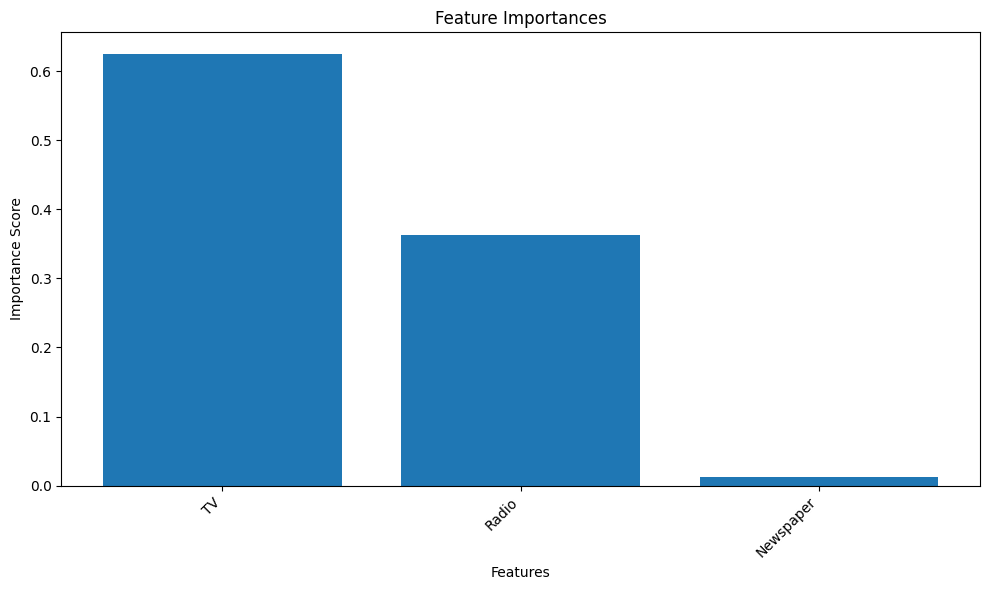

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

model.fit(X_train, y_train)

importances = model.feature_importances_
features = X_train.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), features[indices], rotation=45, ha='right')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()